In [1]:
% matplotlib inline

import cv2
import numpy as np
from skimage.external import tifffile
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 5]

In [2]:
i410 = tifffile.imread('proc_data/cropped_410.tiff')
i470 = tifffile.imread('proc_data/cropped_470.tiff')
rat = tifffile.imread('proc_data/r_410_470.tiff')

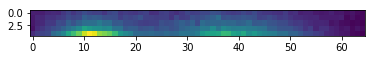

In [27]:
plt.imshow(i410[0][0:5])

In [71]:
h = i410[0].shape[0]
dy = 7
range_ = np.arange(0,h)
list(zip(np.arange(0,h), np.arange(0,h) + dy))

[(0, 7),
 (1, 8),
 (2, 9),
 (3, 10),
 (4, 11),
 (5, 12),
 (6, 13),
 (7, 14),
 (8, 15),
 (9, 16),
 (10, 17),
 (11, 18),
 (12, 19),
 (13, 20),
 (14, 21),
 (15, 22),
 (16, 23),
 (17, 24),
 (18, 25),
 (19, 26),
 (20, 27),
 (21, 28),
 (22, 29),
 (23, 30),
 (24, 31)]

In [72]:
def com_per_col(img):
    n = img.shape[0]
    i = np.arange(n).reshape([n, 1])
    return np.sum(img * i, axis=0) / np.sum(img, axis=0)

def center_of_mass_dy(im, dY):
    height = im.shape[0]

    slices = np.minimum(list(zip(np.arange(0,h), np.arange(0,h) + dy)), height)
    all_coms = []
    for s in slices:
        I = im[s[0]:s[1]]
        coms = com_per_col(I)
        all_coms.append(coms)
    return np.vstack(all_coms)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [73]:
np.savetxt('rmse.csv', np.asarray([rmse(center_of_mass_dy(i410[i], 5), center_of_mass_dy(i470[i], 5)) for i in range(len(i410))]))